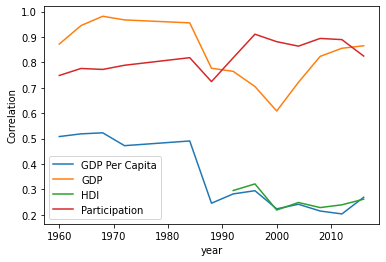

In [26]:
#Correlation Analysis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def norm(A):
    me=np.mean(A)
    std=np.std(A)
    for i in range(len(A)):
        A[i]=(A[i]-me)/std
    return A

def get_data(df,year,factor):
    X=[]
    Y=[]
    for i in range(len(df['Country'])):
        if(df[factor][i]>0 and year==df['Year'][i] and year!=1980 and year!=1976):
            X.append(df[factor][i])
            Y.append(df['Total'][i])
    if(len(X)==0):
        return X,Y
    return norm(X),norm(Y)

df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr1.csv')

year=1956
cgdp=[]
chdi=[]
cpar=[]
ccgdp=[]
yr=[]
while(year<=2012):
    year+=4
    
    #GDP
    X,Y=get_data(df,year,'GDP')
    if(len(X)>0):
        r=np.corrcoef(X,Y)[0][1]
        cgdp.append([year,r])
        
    #cGDP
    X,Y=get_data(df,year,'GDP_c')
    if(len(X)>0):
        r=np.corrcoef(X,Y)[0][1]
        ccgdp.append([year,r])
        
    #HDI
    X,Y=get_data(df,year,'HDI')
    if(len(X)>0):
        r=np.corrcoef(X,Y)[0][1]
        chdi.append([year,r])
        
    #par
    X,Y=get_data(df,year,'Participation')
    if(len(X)>0):
        r=np.corrcoef(X,Y)[0][1]
        cpar.append([year,r])
    
cgdp=np.array(cgdp)
ccgdp=np.array(ccgdp)
chdi=np.array(chdi)
cpar=np.array(cpar)
plt.plot(cgdp[:,0],cgdp[:,1])
plt.plot(ccgdp[:,0],ccgdp[:,1])
plt.plot(chdi[:,0],chdi[:,1])
plt.plot(cpar[:,0],cpar[:,1])

plt.xlabel('year')
plt.ylabel('Correlation')
plt.legend(['GDP Per Capita','GDP','HDI','Participation'])

0.7678948456220052

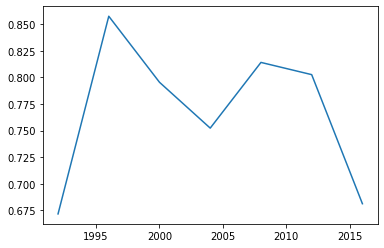

In [11]:
#Correlation Analysis

# Combined

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

def norm(A):
    me=np.mean(A)
    std=np.std(A)
    for i in range(len(A)):
        A[i]=(A[i]-me)/std
    return A

def get_data(df,year):
    X=[]
    Y=[]
    for i in range(len(df['Country'])):
        if(df['HDI'][i]!=-1 and df['GDP'][i]!=-1 and df['Participation'][i]!=0 and year==df['Year'][i] and df['GDP_c'][i]!=-1):
            X.append([df['GDP'][i],df['HDI'][i],df['Participation'][i],df['GDP_c'][i]])
            Y.append(df['Total'][i])
    return np.array(X),np.array(Y)

df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr.csv')

year=1988
corr=[]
yr=[]
while(year<=2012):
    year+=4
    X,Y=get_data(df,year)
    if(len(Y)==0):
        continue
    R=np.corrcoef(X,rowvar=False)
    """for i in range(len(X[0])):
        row=[]
        for j in range(len(X[0])):
            row.append(np.corrcoef(X[:,i],X[:,j])[0][1])
        R.append(row)
    R=np.array(R)"""
    c=[]
    for i in range(len(X[0])):
        c.append(np.corrcoef(X[:,i],Y)[0][1])
    c=np.array(c)
    temp=np.matmul(c,np.linalg.inv(R))
    r=np.matmul(temp,np.transpose(c))
    corr.append(r)
    yr.append(year)
    #print(c,R,corr)
plt.plot(yr,corr)
np.mean(corr)

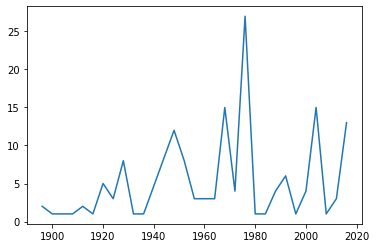

In [2]:
#Host Country Rank

import pandas as pd
import matplotlib.pyplot as plt
def com(A,B):
    if(A=='Korea, Dem. People’s Rep.' and B=='North Korea'):
        return True
    if(A=='Korea, Rep.' and B=='South Korea'):
        return True
    A=A.lower()
    B=B.lower()
    if(A.find(B)!=-1):
        return True
    if(B=='great britain' and A=='united kingdom'):
        return True
    return False

def get_rank(df,ct,yr):
    medals=[]
    rank=0
    for i in range(len(df['Country'])):
        if(int(df['Year'][i])==int(yr) and com(ct,df['Country'][i])):
            medals=[df['Gold'][i],df['Silver'][i],df['Bronze'][i]]
            break
    for i in range(len(df['Country'])):
        if(int(df['Year'][i])==int(yr)):
            if(df['Gold'][i]>medals[0] or (df['Gold'][i]==medals[0] and df['Silver'][i]>medals[1]) or (df['Gold'][i]==medals[0] and df['Silver'][i]==medals[1] and df['Bronze'][i]>medals[2])):
                rank+=1
    return rank+1
    

df1=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr.csv')
df2=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\list-host-cities-olympic-943j.csv')
year=[]
rk=[]

for i in range(len(df2['Country'])):
    ct=df2['Country'][i]
    yr=df2['Year'][i]
    if(yr>2016):
        break
    if((int(yr)<=1936 or int(yr)>=1948) and int(yr)<=2016 and df2['Summer (Olympiad)'][i]!='-'):
        rank=get_rank(df1,ct,yr)
        rk.append(rank)
        year.append(yr)

plt.plot(year,rk)

Text(0, 0.5, 'Medal')

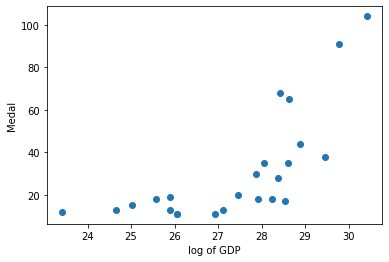

In [28]:
#GDP_c Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def cmp(a):
    return a[0]
df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr1.csv')
data=[]
for i in range(len(df)):
    if(df['Year'][i]==2012 and df['GDP_c'][i]!=-1 and df['Total'][i]>10):
        data.append([df['GDP_c'][i],df['Total'][i]])
data=sorted(data,key=cmp)
data=np.array(data)
X1=np.log(data[:,0])
Y1=data[:,1]
data[:,0]=np.log(data[:,0])
XX=np.copy(data[:,0])
data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])
plt.scatter(XX,data[:,1])
plt.xlabel('log of GDP')
plt.ylabel('Medal')

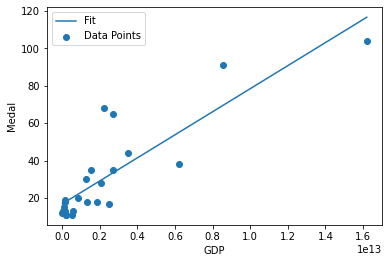

Coefficient: b0: 31.125 ,b1: 21.720894018665632 ,RMSE: 13.145803057626255


In [9]:
X=data[:,0]
Y=data[:,1]
n=len(X)
b1=(n*np.sum(X*Y)-np.sum(X)*np.sum(Y))/(n*np.sum(X*X)-(np.sum(X))**2)
b0=np.mean(Y)-b1*np.mean(X)
rmse=np.sqrt(np.mean((Y-b1*X-b0)*(Y-b1*X-b0)))
plt.plot([min(XX),max(XX)],[min(X)*b1+b0,max(X)*b1+b0],label='Fit')
#plt.plot(range(int(np.floor(min(XX))),int(np.ceil(max(XX)))+1),b0+range(int(np.floor(min(XX))),int(np.ceil(max(XX)))+1)*b1,label='Fit')
plt.scatter(XX,Y,label='Data Points')
plt.xlabel('GDP')
plt.ylabel('Medal')
plt.legend()
plt.show()
print("Coefficient:","b0:",b0,",b1:",b1,",RMSE:",rmse)

[ 12.  13.  15.  18.  19.  13.  11.  11.  11.  13.  20.  30.  18.  35.
  18.  28.  68.  17.  35.  65.  44.  38.  91. 104.]
b0= 20.69859605108838 b1= 22.717117756744194 b2= 10.426403929431194 Rmse= 12.972651462118783


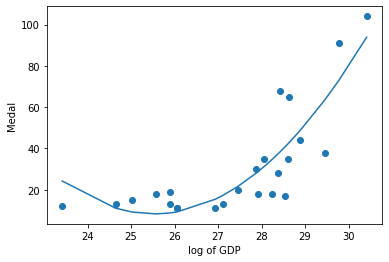

In [4]:
X=X1
Y=Y1
X=(X-np.mean(X))/np.std(X)
import scipy.optimize as optimization
def func(x, a, b, c):
    return a + b*x + c*x*x
coe=optimization.curve_fit(func, X, Y, [0,0,0])[0]
plt.plot(XX,coe[0]+coe[1]*X+coe[2]*X*X)
plt.scatter(XX,Y)
print(Y,)
rmse=np.sqrt(np.mean((Y-coe[0]-coe[1]*X-coe[2]*X*X)**2))
plt.xlabel('log of GDP')
plt.ylabel('Medal')
print("b0=",coe[0],"b1=",coe[1],"b2=",coe[2],"Rmse=",rmse)

Text(0, 0.5, 'Medal')

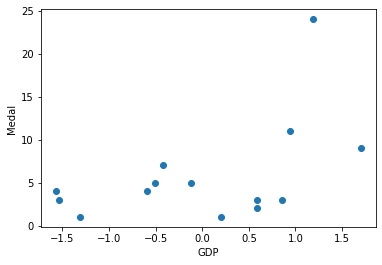

In [14]:
#GDP_c Regression Specific Sport

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def cmp(a):
    return a[0]
df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr1.csv')
df1=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Sports\Swimming_Olympic_data_medal.csv')
dt={}
dt1={}
data=[]
for i in range(len(df)):
    if(df['Year'][i]==2012 and df['GDP_c'][i]!=-1):
        dt[df['Country'][i]]=df['GDP_c'][i]
for i in range(len(df1)):
    if(df1['Year'][i]==2012):
        dt1[df['Country'][i]]=df['Total'][i]

for i in dt1:
    if(i=='United States'):
        continue
    if(i in dt):
        data.append([dt[i],dt1[i]])
data=sorted(data,key=cmp)
data=np.array(data)
XX=np.copy(data[:,0])
X1=np.log(data[:,0])
Y1=data[:,1]
data[:,0]=np.log(data[:,0])
data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])
plt.scatter(data[:,0],data[:,1])
plt.xlabel('GDP')
plt.ylabel('Medal')

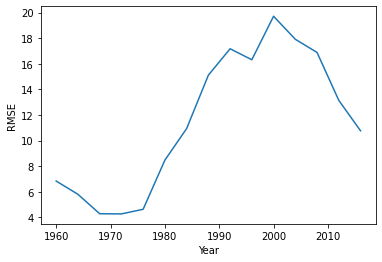

[1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016] [6.841966814202284, 5.808417688140213, 4.290773603266062, 4.27501110747495, 4.6360145932475225, 8.474646405329622, 10.938783421908303, 15.109874047890345, 17.176410230517938, 16.317888013114946, 19.716564192771628, 17.916572256466818, 16.888516647012526, 13.145803057626255, 10.768897062525859]


In [29]:
#GDP_c Regression All Year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def cmp(a):
    return a[0]
year=[]
RMSE=[]
ye=1960
while(ye<=2016):
    df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr1.csv')
    data=[]
    for i in range(len(df)):
        if(df['Year'][i]==ye and df['GDP_c'][i]!=-1 and df['Total'][i]>10):
            data.append([df['GDP_c'][i],df['Total'][i]])
    data=sorted(data,key=cmp)
    data=np.array(data)
    X1=np.log(data[:,0])
    Y1=data[:,1]
    #data[:,0]=np.log(data[:,0])
    XX=np.copy(data[:,0])
    data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])

    X=data[:,0]
    Y=data[:,1]
    n=len(X)
    b1=(n*np.sum(X*Y)-np.sum(X)*np.sum(Y))/(n*np.sum(X*X)-(np.sum(X))**2)
    b0=np.mean(Y)-b1*np.mean(X)
    rmse=np.sqrt(np.mean((Y-b1*X-b0)*(Y-b1*X-b0)))
    year.append(ye)
    RMSE.append(rmse)
    ye+=4
plt.plot(year,RMSE)
plt.xlabel('Year')
plt.ylabel('RMSE')
plt.show()
print(year,RMSE)

[7.037887433103582, 6.157888817042589, 2.6588412670094272, 2.8410793660064804, 5.612974941826047, 6.560212010879031, 17.363188126096645, 15.828144213907452, 18.76727272073576, 17.15812496483343, 20.347092657037496, 18.696954830365343, 17.893185082700235, 12.972651462118783, 11.431837471013502]
2.6588412670094272


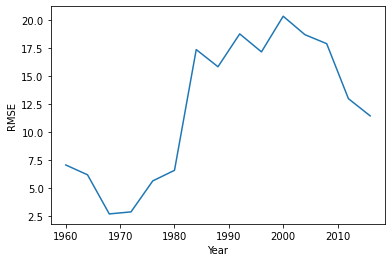

In [26]:
#GDP_c Regression All Year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def cmp(a):
    return a[0]
year=[]
RMSE=[]
ye=1960
while(ye<=2016):
    df=pd.read_csv(r'C:\Users\kkp26\Olympic-Data\Olympic_data_tr1.csv')
    data=[]
    for i in range(len(df)):
        if(df['Year'][i]==ye and df['GDP_c'][i]!=-1 and df['Total'][i]>10):
            data.append([df['GDP_c'][i],df['Total'][i]])
    data=sorted(data,key=cmp)
    data=np.array(data)
    X1=np.log(data[:,0])
    Y1=data[:,1]
    #data[:,0]=np.log(data[:,0])
    XX=np.copy(data[:,0])
    data[:,0]=(data[:,0]-np.mean(data[:,0]))/np.std(data[:,0])

    X=X1
    Y=Y1
    X=(X-np.mean(X))/np.std(X)
    import scipy.optimize as optimization
    def func(x, a, b, c):
        return a + b*x + c*x*x
    coe=optimization.curve_fit(func, X, Y, [0,0,0])[0]
    #print(Y,)
    rmse=np.sqrt(np.mean((Y-coe[0]-coe[1]*X-coe[2]*X*X)**2))
    year.append(ye)
    RMSE.append(rmse)
    ye+=4
print(RMSE)
plt.plot(year,RMSE)
plt.xlabel('Year')
plt.ylabel('RMSE')